In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji
from camel_tools.tokenizers.word import simple_word_tokenize
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import string
import nltk
import emoji
import torch

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

from camel_tools.tokenizers.word import simple_word_tokenize
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec
from imblearn.over_sampling import RandomOverSampler
from transformers import AutoTokenizer, AutoModel






In [2]:
# Charger le fichier CSV
df = pd.read_csv('cleaned_final_data.csv')

In [3]:
# Afficher les premières lignes du DataFrame
print(df.head())

# Afficher des statistiques descriptives du DataFrame
print(df.describe())


                                                Text  Toxic/Not Toxic
0  يبغي التنبيه على ان السعودية تستخدم صواريخ جو ...                1
1  مريكا قتلت بالامس معوق رفض رفع يديه فماذا تريد...                1
2  هذا الشخص هو من كان يد لاحتلال العراق وضرب افغ...                1
3  الى جمال ريان مذيع الجزيرة نحن من رعاك فى المه...                1
4  خيبة ال مل ليست تشا ما ولا تقولا عزم لكفالة ال...                0
       Toxic/Not Toxic
count     77176.000000
mean          0.561211
std           0.496242
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000


<h1>Embedding

In [4]:
df['Text'] = df['Text'].fillna('')

sentences = [text.split() for text in df['Text']]
embedding_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)



In [35]:
embedding_model.wv.save("word_vectors.wv")


In [5]:
sentences

[['يبغي',
  'التنبيه',
  'على',
  'ان',
  'السعودية',
  'تستخدم',
  'صواريخ',
  'جو',
  'ارض',
  'مزودة',
  'بتقنيات',
  'بوليس',
  'النهي',
  'عن',
  'المنكر',
  'في',
  'الجلد',
  'في',
  'الساحات',
  'المعروفة',
  'بدقتها',
  'المطلقة',
  'في',
  'اليمن'],
 ['مريكا',
  'قتلت',
  'بالامس',
  'معوق',
  'رفض',
  'رفع',
  'يديه',
  'فماذا',
  'تريد',
  'من',
  'الشرطة',
  'المصرية',
  'تفعل',
  'عندما',
  'تعامل',
  'مع',
  'مسلحين',
  'معهم',
  'متفجرات'],
 ['هذا',
  'الشخص',
  'هو',
  'من',
  'كان',
  'يد',
  'لاحتلال',
  'العراق',
  'وضرب',
  'افغانستان',
  'ومحارب',
  'لاسلام',
  'ولست',
  'متوقع',
  'ان',
  'قناة',
  'الجزيرة',
  'تنزل',
  'لهذا',
  'المستوى'],
 ['الى',
  'جمال',
  'ريان',
  'مذيع',
  'الجزيرة',
  'نحن',
  'من',
  'رعاك',
  'فى',
  'المهد',
  'واطعمناك',
  'من',
  'خيرنا',
  'وعلمناك',
  'من',
  'علمنا',
  'ولما',
  'اشتد',
  'عودك',
  'خونتنا',
  'وبعت',
  'ارضك',
  'وقضيتك',
  'حقدا',
  'على',
  'مصر'],
 ['خيبة',
  'ال',
  'مل',
  'ليست',
  'تشا',
  'ما',
  'ولا'

In [6]:
def text_to_vector(text):
    vector = []
    for word in text.split():
        if word in embedding_model.wv:
            vector.append(embedding_model.wv[word])
    if vector:
        vector = np.mean(vector, axis=0)
    else:
        vector = np.zeros(embedding_model.vector_size)
    return vector

df['Vector'] = df['Text'].apply(text_to_vector)



In [7]:
text = df['Text'][1]
vector = text_to_vector(text)
print("Text:", text)
print("Vector:", vector)


Text: مريكا قتلت بالامس معوق رفض رفع يديه فماذا تريد من الشرطة المصرية تفعل عندما تعامل مع مسلحين معهم متفجرات
Vector: [-0.36112776  0.30494243  0.24558525 -0.4735253   0.24384551 -0.3850021
  0.2506579   1.0850585   0.13199401 -0.01537475 -0.02701964 -1.0646343
 -0.2907199   0.26681003  0.0011454  -0.5830876   0.1603785  -0.18098271
 -0.15568072 -0.74646485 -0.00845524 -0.09191674  0.53472453 -0.52977324
  0.20772298 -0.0582713  -0.4002066  -0.39734614 -0.34492794  0.27451724
  0.62213135 -0.07906406 -0.11100897 -0.49478194 -0.16031073  0.14285915
  0.17543772 -0.04585664 -0.16069268 -0.67187226  0.723916   -0.5203179
 -0.56017286  0.2660966   0.46549296 -0.23078915  0.05115719  0.08693587
 -0.27859375  0.3943416   0.4321132  -0.7685168   0.03478753 -0.38199148
 -0.40422627  0.34009734  0.4178826  -0.23654373 -0.15537012  0.07007518
 -0.20095162 -0.39382875  0.398158   -0.13022335 -0.33680424  0.58813936
  0.40047592  0.23796111 -0.4905924   0.46194935 -0.3342154  -0.0229991
  0.67000

In [8]:
df.to_csv('embedding_data.csv', index=False)


<h1> Partition Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['Vector'].tolist(), df['Toxic/Not Toxic'].tolist(), test_size=0.2, random_state=42)


In [10]:
print(X_train[1])

[-0.09882917  0.12290701  0.07927855 -0.01784953  0.10019874 -0.13530946
  0.10500646  0.3393027   0.01759651 -0.05283675  0.00079866 -0.28933075
 -0.0807373   0.17062628  0.03240484 -0.09046509  0.08753683 -0.10240202
 -0.02318178 -0.25394845  0.00597633  0.05677351  0.1427609  -0.10832693
  0.02863271 -0.0096206  -0.12273762 -0.01675454 -0.12643234  0.11820293
  0.17366764 -0.0247314  -0.01447842 -0.16735727 -0.1181251   0.15087266
  0.03963425 -0.00832015 -0.10914602 -0.14370403  0.21668334 -0.13318741
 -0.1595377   0.03824209  0.13278395 -0.05557355 -0.00403527 -0.03316787
 -0.05256922  0.13450602  0.05651772 -0.22990818 -0.01538523 -0.14299265
 -0.08776884  0.06657483  0.11881943 -0.04296436 -0.03161937  0.0153317
 -0.08293361 -0.02401959  0.12012056 -0.00859915 -0.12334124  0.16739175
  0.09090238  0.11225545 -0.17447922  0.1667651  -0.04247602  0.05911997
  0.22198603  0.07507807  0.09389732  0.06511833  0.00286643 -0.07319652
 -0.15253109  0.04514971 -0.06322123 -0.05383851  0.

<h1> SVM

In [26]:
svm_model = SVC(verbose=1)
svm_model.fit(X_train, y_train)

[LibSVM]

SVC(verbose=1)

In [27]:
y_preds = svm_model.predict(X_test)

In [28]:
svm_scores = svm_model.decision_function(X_test)


In [29]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6811350090697071
Precision: 0.6778618732261117
Recall: 0.8252706749596868
F1 Score: 0.7443382505713693


In [39]:
import joblib

# Enregistrement du modèle
joblib.dump(svm_model, 'svc_model.pkl')

['svc_model.pkl']

<h1> RandomForest

In [12]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred_prob = rf.predict_proba(X_test)[:,1]



In [13]:
y_predf = rf.predict(X_test)

In [14]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_predf)
precision = precision_score(y_test, y_predf)
recall = recall_score(y_test, y_predf)
f1 = f1_score(y_test, y_predf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7129437678154963
Precision: 0.7211528456976382
Recall: 0.7983183598249252
F1 Score: 0.757776198545892


In [36]:
import joblib

# Enregistrement du modèle
joblib.dump(rf, 'rf_model.pkl')



['rf_model.pkl']

<h1> Naive Bayes

In [16]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred_prob = nb.predict_proba(X_test)[:,1]

In [17]:
y_predn = nb.predict(X_test)

In [18]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_predn)
precision = precision_score(y_test, y_predn)
recall = recall_score(y_test, y_predn)
f1 = f1_score(y_test, y_predn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6133065561026173
Precision: 0.6201612188856409
Recall: 0.8063810181985718
F1 Score: 0.7011166190976916


In [37]:
import joblib

# Enregistrement du modèle
joblib.dump(nb, 'nb_model.pkl')

['nb_model.pkl']

<h1>graph

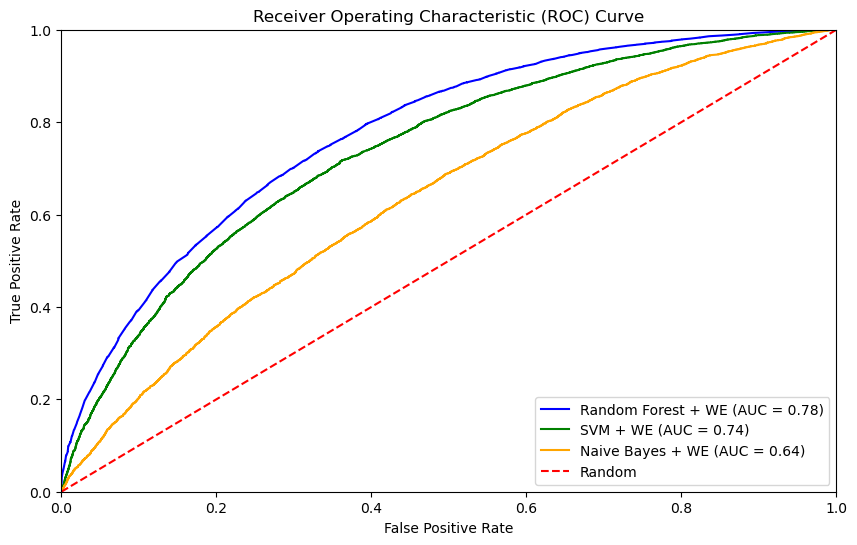

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the False Positive Rate (fpr) and True Positive Rate (tpr) for each classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_pred_prob)  # Add Naive Bayes fpr and tpr

# Compute the Area Under Curve (AUC) for each classifier
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_nb = auc(fpr_nb, tpr_nb)  # Calculate Naive Bayes AUC

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='b', label=f'Random Forest + WE (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='g', label=f'SVM + WE (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='orange', label=f'Naive Bayes + WE (AUC = {roc_auc_nb:.2f})')  # Add Naive Bayes to the plot
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<h1>Test

In [31]:
# Créer la dataframe avec une seule colonne nommée "Text"
Text1 = "حمارة"

Vector1 = text_to_vector(Text1)
print("Text1:", Text1)
print("Vector1:", Vector1)
Vector1 = Vector1.reshape(1, -1)

y1_predf = rf.predict(Vector1)
print(y1_predf)

y3_preds = svm_model.predict(Vector1)
print(y3_preds)

y4_pred = nb.predict(Vector1)
print(y4_pred)

Text1: حمارة
Vector1: [-0.14973335  0.27937302  0.173326    0.06335063  0.28898397 -0.18533576
  0.16484906  0.5778371   0.0417579  -0.20891258 -0.00276609 -0.5513064
 -0.06605551  0.34616688  0.06521963 -0.1399599   0.21855831 -0.18367483
 -0.05237097 -0.40123662  0.02686944  0.152404    0.18436636 -0.14662068
  0.01464185 -0.00133669 -0.20430386 -0.03620192 -0.20337725  0.12012904
  0.2384703  -0.09155199 -0.06529714 -0.31350765 -0.14505193  0.34041578
  0.14252253  0.02628486 -0.24843785 -0.2246633   0.2975564  -0.24473187
 -0.3636355  -0.00180379  0.16782172 -0.0862137  -0.01832524 -0.12746349
 -0.15887056  0.24724707  0.02083155 -0.46724346 -0.0828472  -0.25714663
 -0.19924541  0.13874595  0.3125754  -0.10289153 -0.04760206 -0.01472891
 -0.21915561  0.0486096   0.24671791 -0.0268305  -0.25834274  0.2772142
  0.09554273  0.20843686 -0.31005496  0.21597461 -0.05435853  0.13889569
  0.43520454  0.16488262  0.20220082  0.06374081  0.02643288 -0.14246902
 -0.31455073  0.05804389 -0.201

<h1> Transformers

In [40]:
from transformers import AutoTokenizer, AutoModel

In [41]:
tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabertv02')
model = AutoModel.from_pretrained('aubmindlab/bert-base-arabertv02')

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02 were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [43]:
import torch

def extract_features(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    outputs = model(**inputs)
    # Use the mean of the last hidden state as a sentence representation
    sentence_representation = torch.mean(outputs.last_hidden_state[0], dim=0)
    return sentence_representation.detach().numpy()

df['Text'] = df['Text'].apply(lambda x: str(x) if pd.notnull(x) else '')


# Apply the feature extraction function to the 'Text' column of your DataFrame
df['Features'] = df['Text'].apply(extract_features)
df.head()

,Text,Toxic/Not Toxic,Vector,Features
0,يبغي التنبيه على ان السعودية تستخدم صواريخ جو ...,1,"[-0.3958601, 0.15599905, 0.1723183, -0.8087594...","[-0.44095376, 0.4403092, 0.16838475, -0.674998..."
1,مريكا قتلت بالامس معوق رفض رفع يديه فماذا تريد...,1,"[-0.36112776, 0.30494243, 0.24558525, -0.47352...","[-0.13516936, 0.60581374, 0.07339751, -0.46233..."
2,هذا الشخص هو من كان يد لاحتلال العراق وضرب افغ...,1,"[-0.46898466, 0.35995755, 0.46220547, -0.52535...","[-0.34411076, 0.10868358, 0.0022517145, -0.353..."
3,الى جمال ريان مذيع الجزيرة نحن من رعاك فى المه...,1,"[-0.3926542, 0.20784305, 0.20726022, -0.409501...","[-0.11144646, -0.17460942, 0.22897823, -1.0755..."
4,خيبة ال مل ليست تشا ما ولا تقولا عزم لكفالة ال...,0,"[-0.36352453, 0.53330976, 0.3622666, -0.315772...","[-0.96116817, 0.07800283, 0.17574903, -0.87016..."


<h1> Partition

In [44]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(df['Features'].tolist(), df['Toxic/Not Toxic'].tolist(), test_size=0.2, random_state=42)

<h1>SVM

In [45]:
svm_modelT = SVC(verbose=1)
svm_modelT.fit(X_trainT, y_trainT)

y_predT = svm_modelT.predict(X_testT)

svm_scoresT = svm_modelT.decision_function(X_testT)

[LibSVM]

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracyT = accuracy_score(y_testT, y_predT)
precisionT = precision_score(y_testT, y_predT)
recallT = recall_score(y_testT, y_predT)
f1T = f1_score(y_testT, y_predT)

print("Accuracy:", accuracyT)
print("Precision:", precisionT)
print("Recall:", recallT)
print("F1 Score:", f1T)
print(f1T)

Accuracy: 0.81782845296709
Precision: 0.8186061658706035
Recall: 0.86857866850956
F1 Score: 0.8428523527439366
0.8428523527439366


In [49]:
import joblib

# Enregistrement du modèle
joblib.dump(svm_model, 'svc_yass_model.pkl')

['svc_yass_model.pkl']

<h1> Random Forest

In [64]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_trainT, y_trainT)

RandomForestClassifier()

In [65]:
rf_predTT_prob = rf.predict_proba(X_testT)[:,1]

y_predTT = rf.predict(X_testT)




In [81]:

# Calculate evaluation metrics
accuracyTT = accuracy_score(y_testT, y_predTT)
precisionTT = precision_score(y_testT, y_predTT)
recallTT = recall_score(y_testT, y_predTT)
f1TT = f1_score(y_testT, y_predTT)

print("Accuracy:", accuracyTT)
print("Precision:", precisionTT)
print("Recall:", recallTT)
print("F1 Score:", f1TT)

Accuracy: 0.7933402435864213
Precision: 0.8053146542139203
Recall: 0.8342547800046073
F1 Score: 0.8195293052726862


<h1>Naive Bayes

In [67]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_trainT, y_trainT)
nb_pred_prob = nb.predict_proba(X_testT)[:,1]





In [68]:
y_predTTT = nb.predict(X_testT)

In [82]:
# Calculate evaluation metrics
accuracyTTT = accuracy_score(y_testT, y_predTTT)
precisionTTT = precision_score(y_testT, y_predTTT)
recallTTT = recall_score(y_testT, y_predTTT)
f1TTT = f1_score(y_testT, y_predTTT)

print("Accuracy:", accuracyTTT)
print("Precision:", precisionTTT)
print("Recall:", recallTTT)
print("F1 Score:", f1TTT)

Accuracy: 0.6929904120238404
Precision: 0.7457922952250343
Recall: 0.6890117484450587
F1 Score: 0.7162785128420044


<h1> graph

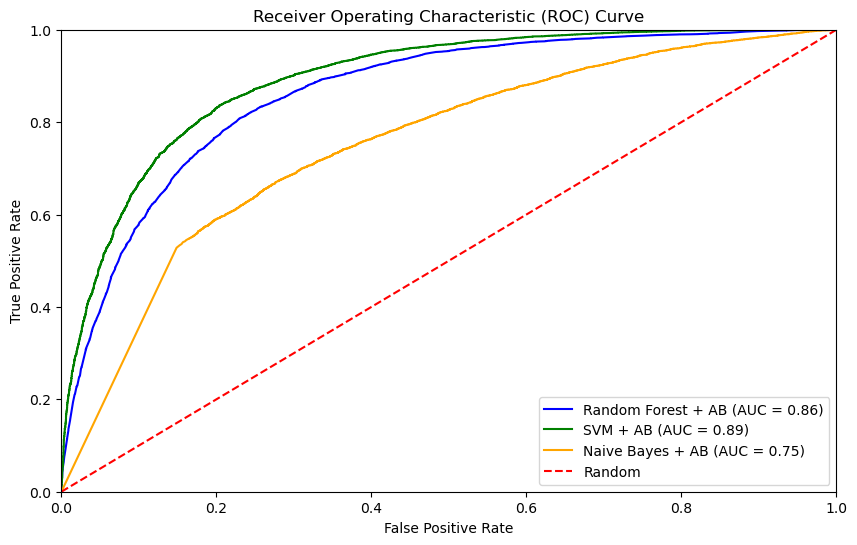

In [83]:

# Compute the False Positive Rate (fpr) and True Positive Rate (tpr) for each classifier
fpr_rf, tpr_rf, _ = roc_curve(y_testT,  rf_predTT_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_testT, svm_scoresT)
fpr_nb, tpr_nb, _ = roc_curve(y_testT, nb_pred_prob)  # Add Naive Bayes fpr and tpr



# Compute the Area Under Curve (AUC) for each classifier
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_nb = auc(fpr_nb, tpr_nb)  # Calculate Naive Bayes AUC

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='b', label=f'Random Forest + AB (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='g', label=f'SVM + AB (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='orange', label=f'Naive Bayes + AB (AUC = {roc_auc_nb:.2f})')  # Add Naive Bayes to the plot
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [91]:
import torch
import pandas as pd

def extract_features(text):
    tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabertv02')
    model = AutoModel.from_pretrained('aubmindlab/bert-base-arabertv02')
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    outputs = model(**inputs)
    sentence_representation = torch.mean(outputs.last_hidden_state[0], dim=0)
    return sentence_representation.detach().numpy()


Text1 = "متعجرف"

# Appliquez la fonction extract_features directement sur le texte
Vector1 = extract_features(Text1)
Vector1 = Vector1.reshape(1, -1)

# Effectuez les prédictions à l'aide des modèles entraînés précédemment (rf, svm_model, nb)
y3_preds = svm_modelT.predict(Vector1)
print(y3_preds)

#y1_predf = rf.predict(Vector1)

#y4_pred = nb.predict(Vector1)

# Affichez les prédictions
#print(y1_predf)

#print(y4_pred)




Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02 were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[1]


In [73]:

import pickle

with open('svm_scores.pkl', 'rb') as f:
     svm_scores = pickle.load(f)
        
with open('rf_probs.pkl', 'rb') as f:
    rf_probs = pickle.load(f)

with open('nb_probs.pkl', 'rb') as f:
    nb_probs = pickle.load(f)

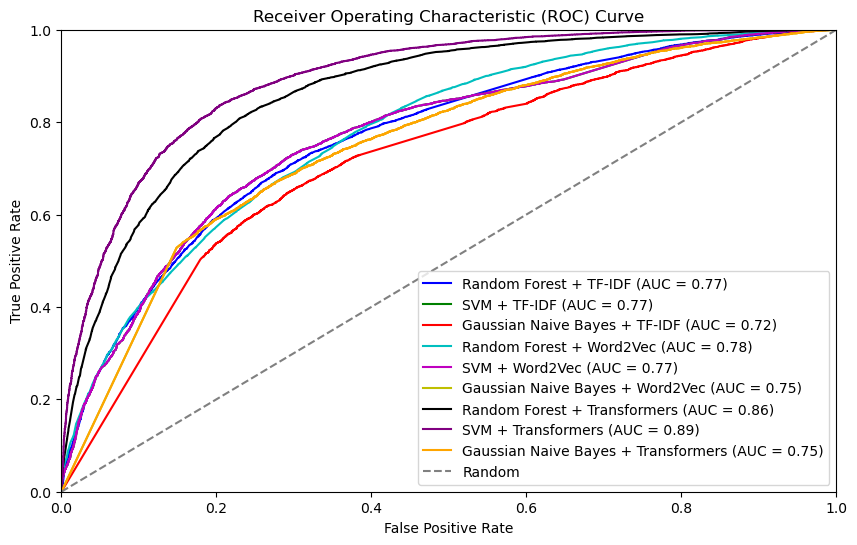

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the values for the different probabilities and y_test

# Compute the False Positive Rate (fpr) and True Positive Rate (tpr) for each classifier
fpr_rf_tfidf, tpr_rf_tfidf, _ = roc_curve(y_test, rf_probs)
fpr_svm_tfidf, tpr_svm_tfidf, _ = roc_curve(y_test, svm_scores)
fpr_nb_tfidf, tpr_nb_tfidf, _ = roc_curve(y_test, nb_probs)



fpr_rf_w2v, tpr_rf_w2v, _ = roc_curve(y_test, rf_pred_prob)
fpr_svm_w2v, tpr_svm_w2v, _ = roc_curve(y_test, svm_scores)
fpr_nb_w2v, tpr_nb_w2v, _ = roc_curve(y_test, nb_pred_prob)

fpr_rf_transformers, tpr_rf_transformers, _ = roc_curve(y_testT, rf_predTT_prob)
fpr_svm_transformers, tpr_svm_transformers, _ = roc_curve(y_testT, svm_scoresT)
fpr_nb_transformers, tpr_nb_transformers, _ = roc_curve(y_testT, nb_pred_prob)

# Compute the Area Under Curve (AUC) for each classifier
roc_auc_rf_tfidf = auc(fpr_rf_tfidf, tpr_rf_tfidf)
roc_auc_svm_tfidf = auc(fpr_svm_tfidf, tpr_svm_tfidf)
roc_auc_nb_tfidf = auc(fpr_nb_tfidf, tpr_nb_tfidf)

roc_auc_rf_w2v = auc(fpr_rf_w2v, tpr_rf_w2v)
roc_auc_svm_w2v = auc(fpr_svm_w2v, tpr_svm_w2v)
roc_auc_nb_w2v = auc(fpr_nb_w2v, tpr_nb_w2v)

roc_auc_rf_transformers = auc(fpr_rf_transformers, tpr_rf_transformers)
roc_auc_svm_transformers = auc(fpr_svm_transformers, tpr_svm_transformers)
roc_auc_nb_transformers = auc(fpr_nb_transformers, tpr_nb_transformers)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_tfidf, tpr_rf_tfidf, color='b', label=f'Random Forest + TF-IDF (AUC = {roc_auc_rf_tfidf:.2f})')
plt.plot(fpr_svm_tfidf, tpr_svm_tfidf, color='g', label=f'SVM + TF-IDF (AUC = {roc_auc_svm_tfidf:.2f})')
plt.plot(fpr_nb_tfidf, tpr_nb_tfidf, color='r', label=f'Gaussian Naive Bayes + TF-IDF (AUC = {roc_auc_nb_tfidf:.2f})')

plt.plot(fpr_rf_w2v, tpr_rf_w2v, color='c', label=f'Random Forest + Word2Vec (AUC = {roc_auc_rf_w2v:.2f})')
plt.plot(fpr_svm_w2v, tpr_svm_w2v, color='m', label=f'SVM + Word2Vec (AUC = {roc_auc_svm_w2v:.2f})')
plt.plot(fpr_nb_w2v, tpr_nb_w2v, color='y', label=f'Gaussian Naive Bayes + Word2Vec (AUC = {roc_auc_nb_w2v:.2f})')

plt.plot(fpr_rf_transformers, tpr_rf_transformers, color='k', label=f'Random Forest + Transformers (AUC = {roc_auc_rf_transformers:.2f})')
plt.plot(fpr_svm_transformers, tpr_svm_transformers, color='purple', label=f'SVM + Transformers (AUC = {roc_auc_svm_transformers:.2f})')
plt.plot(fpr_nb_transformers, tpr_nb_transformers, color='orange', label=f'Gaussian Naive Bayes + Transformers (AUC = {roc_auc_nb_transformers:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()